In [24]:
from IPython.display import HTML, Image, YouTubeVideo

# MSDS688 -- Artifical Intelligence

## Week 7 - Bayes Nets

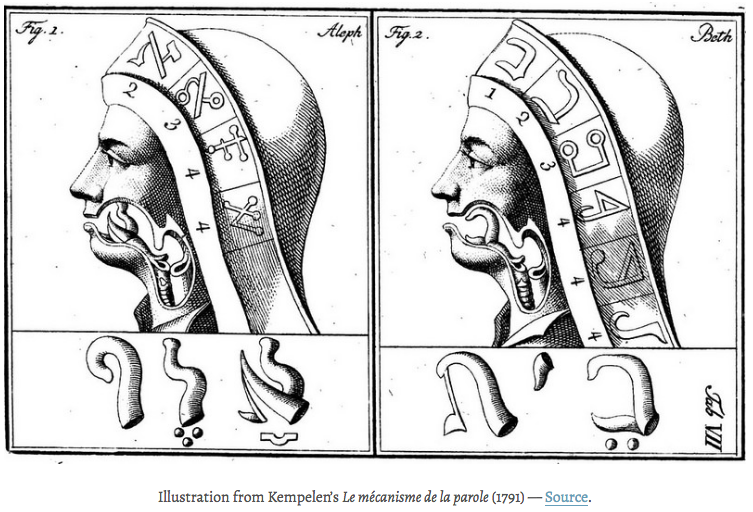

In [25]:
Image('images/kempelen-speaking-machine.png')

About a decade later, a Hungarian engineer named Wolfgang von Kempelen designed a speaking machine using an ivory glottis, bellows for lungs, a leather vocal tract with a hinged tongue, a rubber oral cavity and mouth, and a nose with two little pipes as nostrils. Its pronouncements were more whimsical than those of Mical’s talking heads: “my wife is my friend”, for example, and “come with me to Paris”.

## Learning Objectives

1. Construct models of human thought using Bayesian networks (aka Bayes nets)

1. Understand how search can also be used to create and optimize Bayes nets

1. Compare how many variables are needed for a Bayes net versus a joint probability table


# TO-DO

1. Evaluating Bayes net 

1. Simulating data

1. Issues with Bayes nets

# Probability review

## Conditional Probability

* $P(A \mid B) = \frac{P(A \cap B)}{P(B)}$


## Chain Rule

* $ P(A\,B\,C) = P(A \mid BC)\; P(B \mid C)\; P(C)$

* $P(A_1 A_2 A_3 \dots A_N) =  P(A_1 \mid A_2 \dots A_{n}) \; P(A_2 \mid A_3 \dots A_{n}) \dots P(A_n)$

## Independence

* $P(AB) = P(A)\;\bullet\;P(B)\;\; \text{iff} \; A \; \text{independent from } B$

* $P(A \mid B) = P(A) \;\; \text{iff} \; A \; \text{independent from } B$

## Conditional Independence

* $P(A \mid B, C) = P(A \mid C)  \;\; \text{iff} \; A \; \text{independent from } $

* $P(A, B \mid C) = P(A \mid C) \;\bullet\  P(B \mid C) \;\; \text{iff} \; A \; \text{independent from } B$

* $P(A \mid B, C) = P(A  \mid B) \;\bullet\  P(A  \mid C)  \;\; A \;\; \text{iff} \; A \; \text{independent from } B$

# Number of parameters

* Naive Bayes:  __n__  (all variables independent)

* Joint probability table: $O(2^{n}) - 1 \;$ assuming Boolean variable

* Bayes Net:  O(n) --> Linear f(N) that is model dependent 

* Bayes nets are _exponentially smaller_ than a JPT

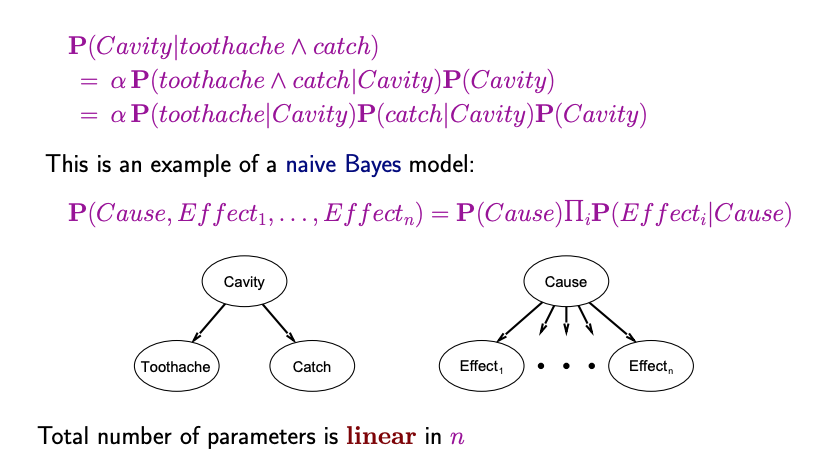

In [39]:
Image('./images/naive-bayes-and-conditional-independent.png')

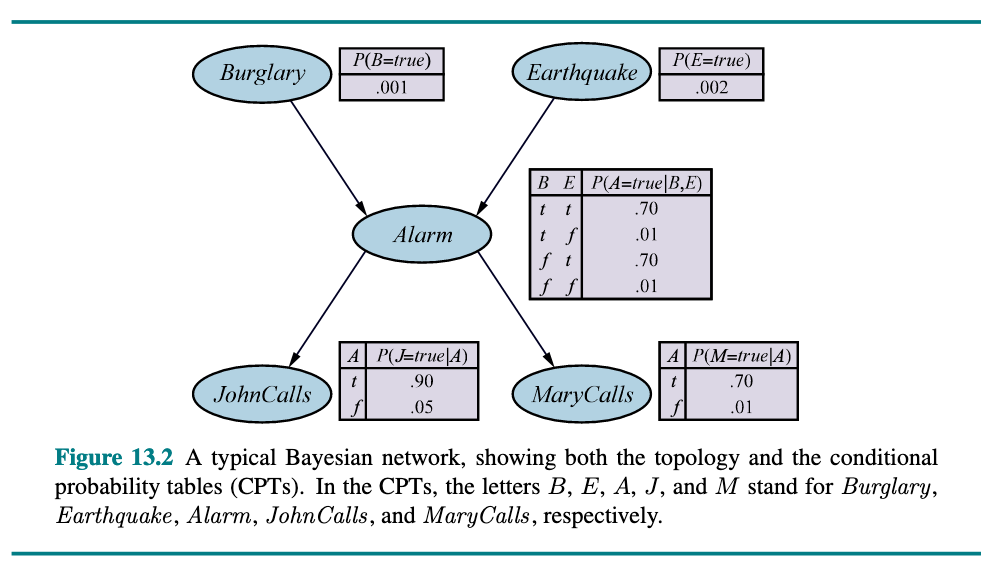

In [27]:
Image('./images/Figure-S14-2-bayesian-belief-net.png')

# Bayes net assumption

> _Each variable is conditionally independent of its non-descendants, given its parents._


# Graph terminology

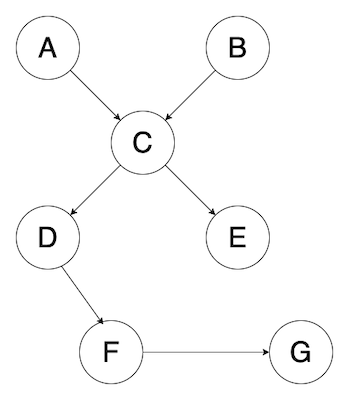

In [28]:
Image('./images/d-sep-0-complete.png')

* Consider F. 
    * Which variables are its descendants?  
    * Which variables are its parents?  
    * Which variables are its ancestors?  
    * Which variables are its non-descendants?

# Solution

| Question                                | Answer        |
|-----------------------------------------|---------------|
| Which variables are its descendants?     | G             |
| Which variables are its parents?         | D             |
| Which variables are its ancestors?       | A, B, C, D    |
| Which variables are its non-descendants? | A, B, C, D, E |

# Structural Independence

* Use d-separation to determine graphically whether two variables are independent

* Steps
    1. Draw the ancestral graph
    1. Link the parents for every pair of variable with a common child
    1. Disorient the graph by making all edges undirected
    1. Delete the givens and their edges
    1. Read the answer off the graph (disconnected = independent)

* Disconnected variables are guaranteed to be independent

* Connected variables are _likely_ to be dependent but there are exceptions

* For details see: [d-separation: How to determine which variables are independent in a Bayes net](http://web.mit.edu/jmn/www/6.034/d-separation.pdf)

# D-Separation illustrated

* Question: Is $A \perp \!\!\! \perp B  \mid D, F$?

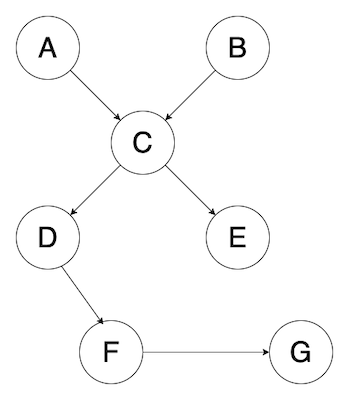

In [41]:
Image('./images/d-sep-0-complete.png')

## Step 1 - Draw the ancestral graph

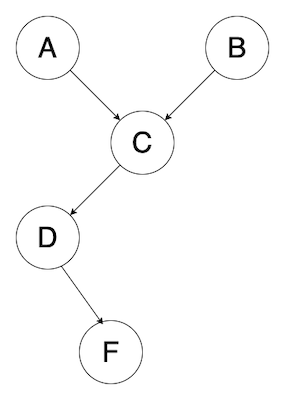

In [42]:
Image('./images/d-sep-1-ancestral.png')

## Step 2 - Connect the parents

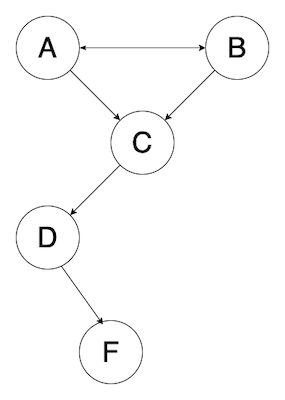

In [44]:
Image('./images/d-sep-2-connect-parents.png')

## Step 3 - Disorient the edges

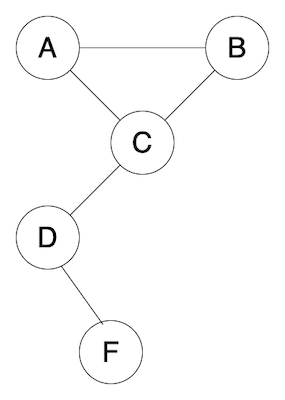

In [31]:
Image('./images/d-sep-3-disorient-edges.png')

## Step 4 - Delete the givens and their edges

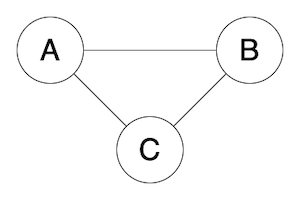

In [32]:
Image('./images/d-sep-4-delete-parents-givens.png')

## Step 5 - Read the answer off the graph

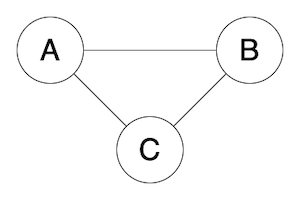

In [33]:
Image('./images/d-sep-4-delete-parents-givens.png')

* Question: Is $A \perp \!\!\! \perp B  \mid D, F$?

* Answer: __No__, A is not independent from B given D and F

* Or at least, __probably not__ because A is connected to B

* Because dependent results are not guaranteed by d-separation

# Constructing Bayes net models

* Bayes nets can evaluate models

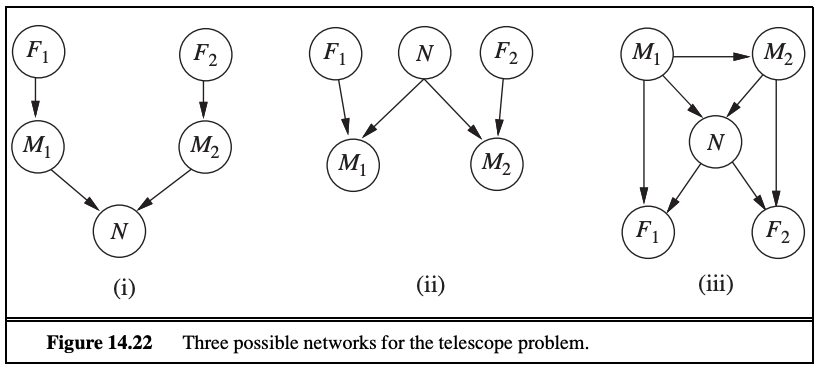

In [34]:
Image('./images/Figure-S14-22-possible-models.png')

* ... but _creation is on you_

# Alternatives

* Use __search__

* Such as _stochastic hill-climbing_

* Or, _simulated annealing_

* That use random processes to break out of local maxima to try and find better solutions

* Evaluate --> Keep best --> Mutate best --> Repeat

* Performance is surprisingly good, and in limited circumstances optimal solutions!

# Issues facing hill-climbing search

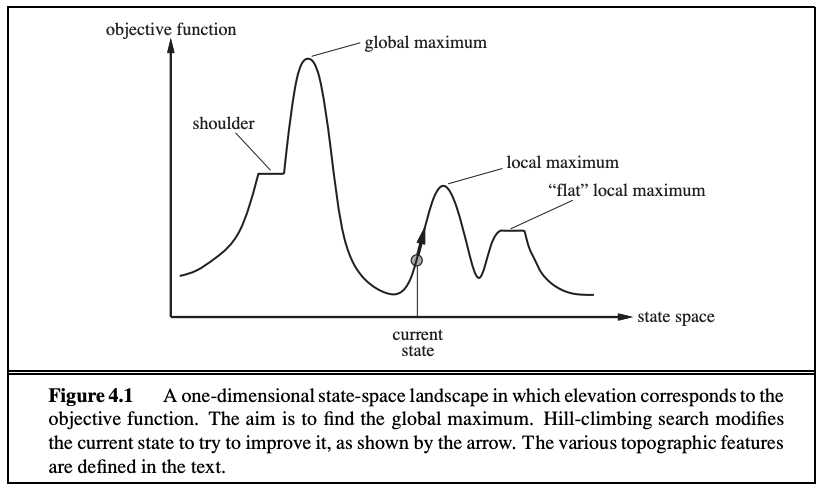

In [35]:
Image('./images/Figure-S4-1-hill-climbing-challenges.png')

# Simulated annealing algorithm

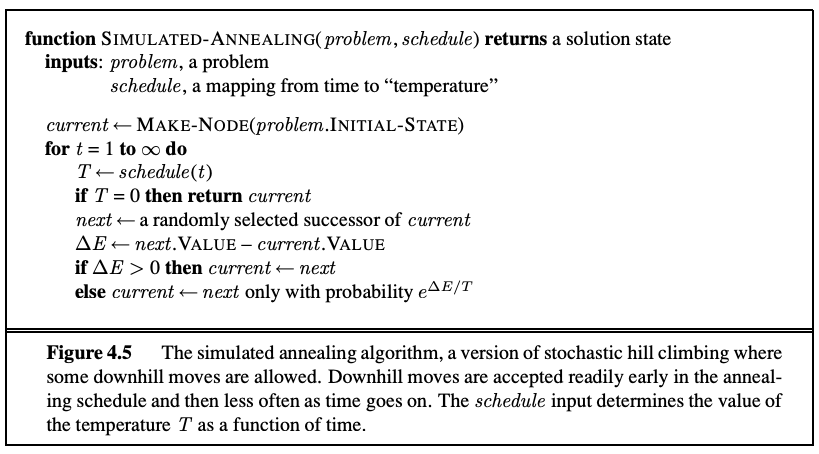

In [36]:
Image('./images/Figure-S4-5-simulated-annealing-alg.png')

# Exercise

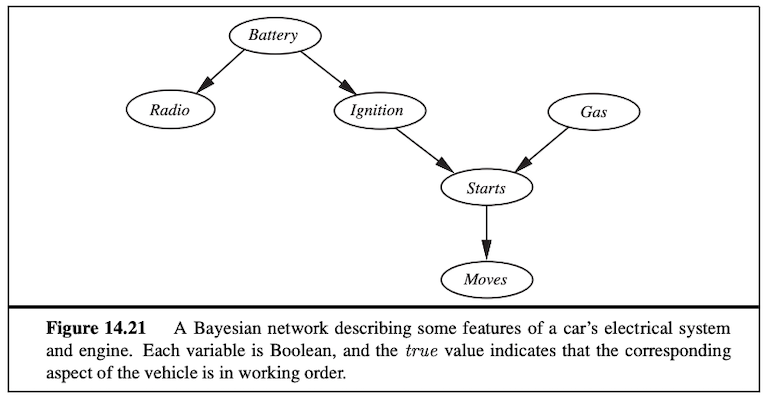

In [37]:
Image('./images/figure-S14-21-car-starting-bayes-net.png')

* Extend the network by adding Boolean variables _IcyWeather_ and _StarterMotor_

* How many independent variables are contained in the joint probability table for 8 Boolean variables?  Assume no conditional independence.

* How many independent probability values are contained in the tables of your Bayes net?

* Fill in some reasonable values into each variables table

# Solution

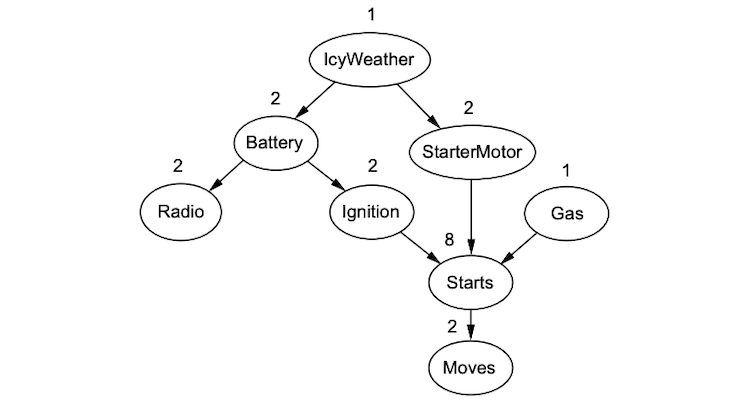

In [38]:
Image('./images/Figure-S14-1-car-starter-bayes-net-solution.png')

# Summary

* Uncertainty arises in complex, non-deterministic and partially observable worlds

* Combining probability and graph theory enables Bayes nets deal with uncertainty

* Bayes nets can efficiently model human thinking

* Model creation is on _you_, or alternatively, stochastic search

* Applications of Bayes nets
  * Disease diagnosis
  * Spam filtering
  * Optimizing web search
  * Gene regulatory networks

# Citations

* Cite: Riskin, J. (n.d.). Frolicsome Engines: The Long Prehistory of Artificial Intelligence. Retrieved April 10, 2018, from [https://publicdomainreview.org/2016/05/04/frolicsome-engines-the-long-prehistory-of-artificial-intelligence/](https://publicdomainreview.org/2016/05/04/frolicsome-engines-the-long-prehistory-of-artificial-intelligence/)

* Russell, S. J., & Norvig, P. (2010). Artificial intelligence: A modern approach (3rd ed ed.). Upper Saddle River: Prentice-Hall. Note: Used text PDF, solutions manual, and books web resources that are available at http://aima.eecs.berkeley.edu/3rd-ed/.

* Bayesian Networks In Python Tutorial - Bayesian Net Example. (2020, November 25). Retrieved from https://www.edureka.co/blog/bayesian-networks/

* Noss, J. (Adapter). (2016, November 30). 6.034 Recitation 9: Bayesian Inference [Video file]. Retrieved February 24, 2021, from https://youtu.be/IBHGlFxcAk8